<a href="https://colab.research.google.com/github/lfaferreira/covid19_case_study/blob/main/Covid_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas#

In [4]:
# data manipulation
import pandas as pd

# numerical computation
import numpy as np

# plotting and creating interesting visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly.subplots import make_subplots

# date manipulation
from datetime import datetime

#Datasets Gerais#

In [5]:
data1 = pd.read_csv('brazil_covid19.csv', sep = ',', encoding='utf-8')
data1.head()

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0.0,0
1,2020-02-25,Centro-Oeste,GO,0.0,0
2,2020-02-25,Centro-Oeste,MS,0.0,0
3,2020-02-25,Centro-Oeste,MT,0.0,0
4,2020-02-25,Nordeste,AL,0.0,0


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12258 entries, 0 to 12257
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    12258 non-null  object 
 1   region  12258 non-null  object 
 2   state   12258 non-null  object 
 3   cases   12258 non-null  float64
 4   deaths  12258 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 479.0+ KB


In [7]:
data2 = pd.read_csv('brazil_covid19_cities.csv', sep=',', encoding='utf-8')
data2.head()

,date,state,name,code,cases,deaths
0,2020-03-27,AC,Acrelândia,120001.0,0.0,0
1,2020-03-27,AC,Assis Brasil,120005.0,0.0,0
2,2020-03-27,AC,Brasiléia,120010.0,0.0,0
3,2020-03-27,AC,Bujari,120013.0,0.0,0
4,2020-03-27,AC,Capixaba,120017.0,0.0,0


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356110 entries, 0 to 2356109
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   state   object 
 2   name    object 
 3   code    float64
 4   cases   float64
 5   deaths  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 107.9+ MB


In [9]:
data3 = pd.read_csv('brazil_population_2019.csv', sep = ',', encoding='utf-8', error_bad_lines=False)
data3.head()

<ipython-input-9-357583b5594a>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data3 = pd.read_csv('brazil_population_2019.csv', sep = ',', encoding='utf-8', error_bad_lines=False)
Skipping line 1282: expected 8 fields, saw 9
Skipping line 1283: expected 8 fields, saw 9
Skipping line 1293: expected 8 fields, saw 9
Skipping line 1294: expected 8 fields, saw 9
Skipping line 1300: expected 8 fields, saw 9
Skipping line 1308: expected 8 fields, saw 9
Skipping line 1309: expected 8 fields, saw 9
Skipping line 1314: expected 8 fields, saw 9
Skipping line 1319: expected 8 fields, saw 9
Skipping line 1320: expected 8 fields, saw 9
Skipping line 1321: expected 8 fields, saw 9
Skipping line 1323: expected 8 fields, saw 9



,region,state,city,state_code,city_code,health_region_code,health_region,population
0,Centro-Oeste,Mato Grosso do Sul,Alcinópolis,50,500025,50001,Campo Grande,5343
1,Centro-Oeste,Mato Grosso do Sul,Amambai,50,500060,50003,Dourados,39396
2,Centro-Oeste,Mato Grosso do Sul,Bataguassu,50,500190,50004,Três Lagoas,23024
3,Centro-Oeste,Mato Grosso do Sul,Batayporã,50,500200,50003,Dourados,11329
4,Centro-Oeste,Mato Grosso do Sul,Bela Vista,50,500210,50001,Campo Grande,24629


In [10]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2853 entries, 0 to 2852
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   region              2853 non-null   object
 1   state               2853 non-null   object
 2   city                2853 non-null   object
 3   state_code          2853 non-null   int64 
 4   city_code           2853 non-null   int64 
 5   health_region_code  2853 non-null   int64 
 6   health_region       2853 non-null   object
 7   population          2853 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 178.4+ KB


In [11]:
data4 = pd.read_csv('vaccinations_country_data_brazil.csv')
data4.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Brazil,2021-01-17,Sinovac,https://coronavirusbra1.github.io,112.0,112.0,0.0,0.0
1,Brazil,2021-01-18,Sinovac,https://coronavirusbra1.github.io,1109.0,1109.0,0.0,0.0
2,Brazil,2021-01-19,Sinovac,https://coronavirusbra1.github.io,13527.0,13527.0,0.0,0.0
3,Brazil,2021-01-20,Sinovac,https://coronavirusbra1.github.io,105824.0,105824.0,0.0,0.0
4,Brazil,2021-01-21,Sinovac,https://coronavirusbra1.github.io,193699.0,193699.0,0.0,0.0


In [12]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 700 non-null    object 
 1   date                     700 non-null    object 
 2   vaccine                  700 non-null    object 
 3   source_url               700 non-null    object 
 4   total_vaccinations       695 non-null    float64
 5   people_vaccinated        691 non-null    float64
 6   people_fully_vaccinated  694 non-null    float64
 7   total_boosters           683 non-null    float64
dtypes: float64(4), object(4)
memory usage: 43.9+ KB


#Visualização Geral por Estados

In [13]:
covid_df = pd.read_csv('brazil_covid19_cities.csv', sep=',', encoding='utf-8')
covid_df.head(10)

,date,state,name,code,cases,deaths
0,2020-03-27,AC,Acrelândia,120001.0,0.0,0
1,2020-03-27,AC,Assis Brasil,120005.0,0.0,0
2,2020-03-27,AC,Brasiléia,120010.0,0.0,0
3,2020-03-27,AC,Bujari,120013.0,0.0,0
4,2020-03-27,AC,Capixaba,120017.0,0.0,0
5,2020-03-27,AC,Cruzeiro do Sul,120020.0,0.0,0
6,2020-03-27,AC,Epitaciolândia,120025.0,0.0,0
7,2020-03-27,AC,Feijó,120030.0,0.0,0
8,2020-03-27,AC,Jordão,120032.0,0.0,0
9,2020-03-27,AC,Mâncio Lima,120033.0,0.0,0


In [14]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356110 entries, 0 to 2356109
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   state   object 
 2   name    object 
 3   code    float64
 4   cases   float64
 5   deaths  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 107.9+ MB


In [15]:
covid_df.describe()

,code,cases,deaths
count,2.356110e+06,2.356110e+06,2.356110e+06
mean,3.253586e+05,1.081011e+03,2.961563e+01
std,9.848221e+04,7.849223e+03,3.184565e+02
min,1.100010e+05,0.000000e+00,0.000000e+00
25%,2.512100e+05,2.000000e+01,0.000000e+00
50%,3.146275e+05,1.510000e+02,3.000000e+00
75%,4.119200e+05,5.570000e+02,1.100000e+01
max,5.300100e+05,7.688680e+05,2.986600e+04


In [16]:
vaccine_df = pd.read_csv('vaccinations_country_data_brazil.csv')
vaccine_df.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Brazil,2021-01-17,Sinovac,https://coronavirusbra1.github.io,112.0,112.0,0.0,0.0
1,Brazil,2021-01-18,Sinovac,https://coronavirusbra1.github.io,1109.0,1109.0,0.0,0.0
2,Brazil,2021-01-19,Sinovac,https://coronavirusbra1.github.io,13527.0,13527.0,0.0,0.0
3,Brazil,2021-01-20,Sinovac,https://coronavirusbra1.github.io,105824.0,105824.0,0.0,0.0
4,Brazil,2021-01-21,Sinovac,https://coronavirusbra1.github.io,193699.0,193699.0,0.0,0.0


In [17]:
covid_df.drop(['code'], inplace=True, axis=1)

In [18]:
covid_df.head()

,date,state,name,cases,deaths
0,2020-03-27,AC,Acrelândia,0.0,0
1,2020-03-27,AC,Assis Brasil,0.0,0
2,2020-03-27,AC,Brasiléia,0.0,0
3,2020-03-27,AC,Bujari,0.0,0
4,2020-03-27,AC,Capixaba,0.0,0


In [19]:
covid_df['date'] = pd.to_datetime(covid_df['date'], format = '%Y-%m-%d')

In [20]:
covid_df.head()

,date,state,name,cases,deaths
0,2020-03-27,AC,Acrelândia,0.0,0
1,2020-03-27,AC,Assis Brasil,0.0,0
2,2020-03-27,AC,Brasiléia,0.0,0
3,2020-03-27,AC,Bujari,0.0,0
4,2020-03-27,AC,Capixaba,0.0,0


In [21]:
# Active cases

covid_df['active_cases'] = covid_df['cases'] - covid_df['deaths']
covid_df.tail()

,date,state,name,cases,deaths,active_cases
2356105,2021-05-23,TO,Tocantinópolis,1968.0,41,1927.0
2356106,2021-05-23,TO,Tupirama,143.0,2,141.0
2356107,2021-05-23,TO,Tupiratins,80.0,1,79.0
2356108,2021-05-23,TO,Wanderlândia,772.0,11,761.0
2356109,2021-05-23,TO,Xambioá,2031.0,27,2004.0


In [22]:
statewise = pd.pivot_table(covid_df,
                           values = ['cases', 'deaths', 'active_cases'],
                           index = 'state',
                           aggfunc = max)

In [23]:
statewise['activity_rate'] = statewise['active_cases']*100/statewise['cases']

In [24]:
statewise['mortality_rate'] = statewise['deaths']*100/statewise['cases']

In [25]:
statewise = statewise.sort_values(by = 'cases', ascending = False)

In [26]:
statewise.style.background_gradient(cmap = 'cubehelix')

,active_cases,cases,deaths,activity_rate,mortality_rate
state,,,,,
SP,739002.000000,768868.000000,29866,96.115588,3.884412
DF,389984.000000,398450.000000,8466,97.875267,2.124733
RJ,289431.000000,315355.000000,25924,91.779423,8.220577
CE,220294.000000,228596.000000,8302,96.368265,3.631735
BA,198208.000000,204617.000000,6409,96.867807,3.132193
MG,194313.000000,199192.000000,4894,97.550604,2.456926
AM,166452.000000,175402.000000,8950,94.897436,5.102564
PR,151017.000000,156050.000000,5033,96.774752,3.225248
GO,141245.000000,145999.000000,4754,96.743813,3.256187


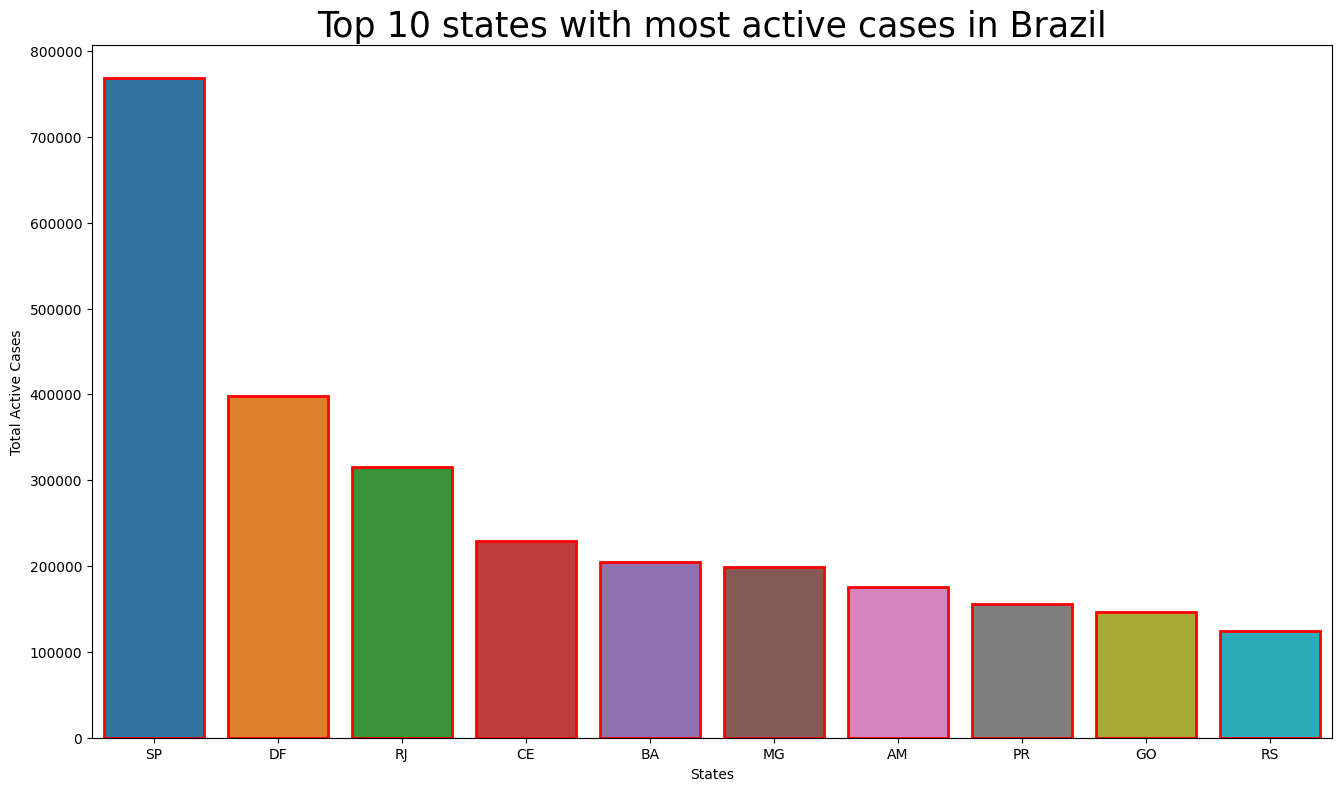

In [27]:
# top 10 active cases states

top_10_active_cases = covid_df.groupby(by = 'state').max()[['cases', 'date']].sort_values(by= ['cases'], ascending = False).reset_index()

fig = plt.figure(figsize = (16, 9))

plt.title('Top 10 states with most active cases in Brazil', size = 25)

ax = sns.barplot(data= top_10_active_cases.iloc[:10],
                 y= 'cases',
                 x= 'state',
                 linewidth = 2,
                 edgecolor = 'red')

plt.xlabel('States')
plt.ylabel('Total Active Cases')
plt.show()

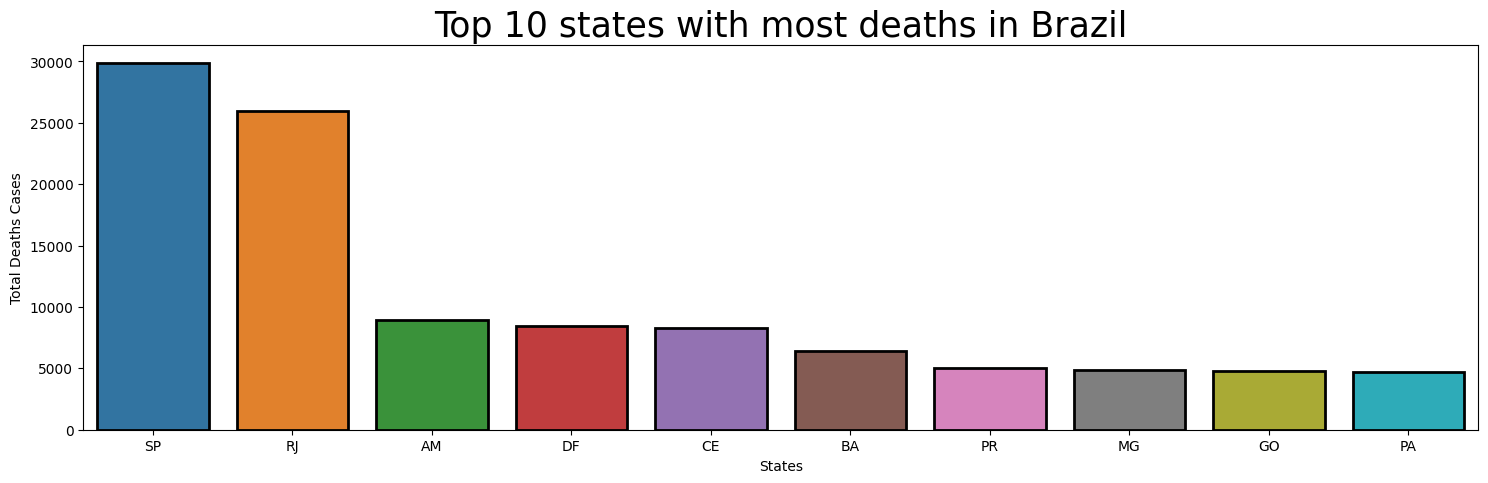

In [28]:
# Top states with highest deaths

top_10_death_cases = covid_df.groupby(by='state').max()[['deaths', 'date']].sort_values(by=['deaths'], ascending = False).reset_index()

fig = plt.figure(figsize = (18, 5))

plt.title('Top 10 states with most deaths in Brazil', size = 25)

ax = sns.barplot(data = top_10_death_cases.iloc[:10],
                  x = 'state',
                  y = 'deaths',
                  linewidth = 2,
                  edgecolor = 'Black')

plt.xlabel('States')
plt.ylabel('Total Deaths Cases')
plt.show()


Text(0.5, 1.0, 'Top 5 Affected States in Brazil')

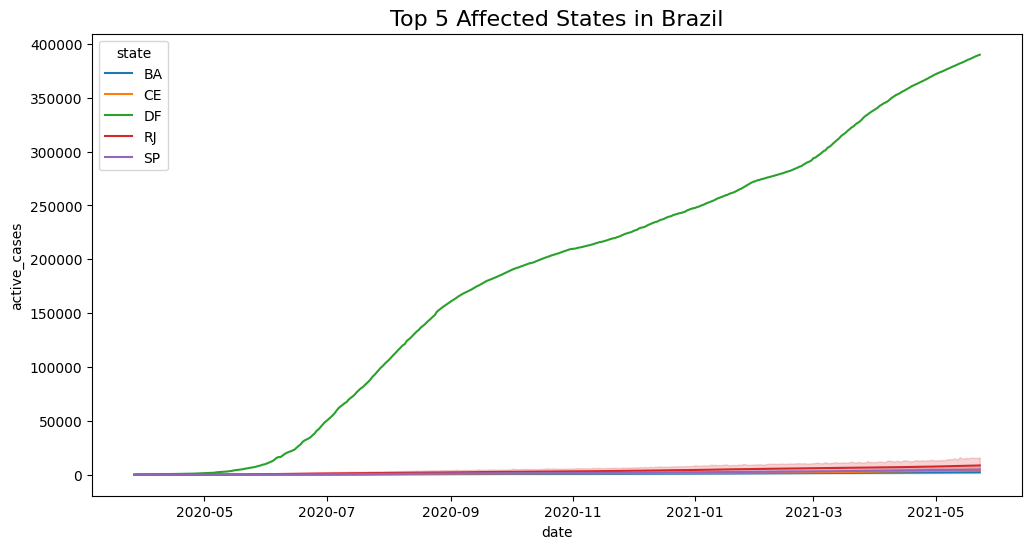

In [29]:
# Growth Trend

fig = plt.figure(figsize=(12, 6))

ax = sns.lineplot(data= covid_df[covid_df['state'].isin(['SP', 'DF', 'RJ', 'CE', 'BA'])],
                  x = 'date',
                  y = 'active_cases',
                  hue = 'state')

ax.set_title('Top 5 Affected States in Brazil', size = 16)

Text(0.5, 1.0, 'Top 5 Affected States in Brazil')

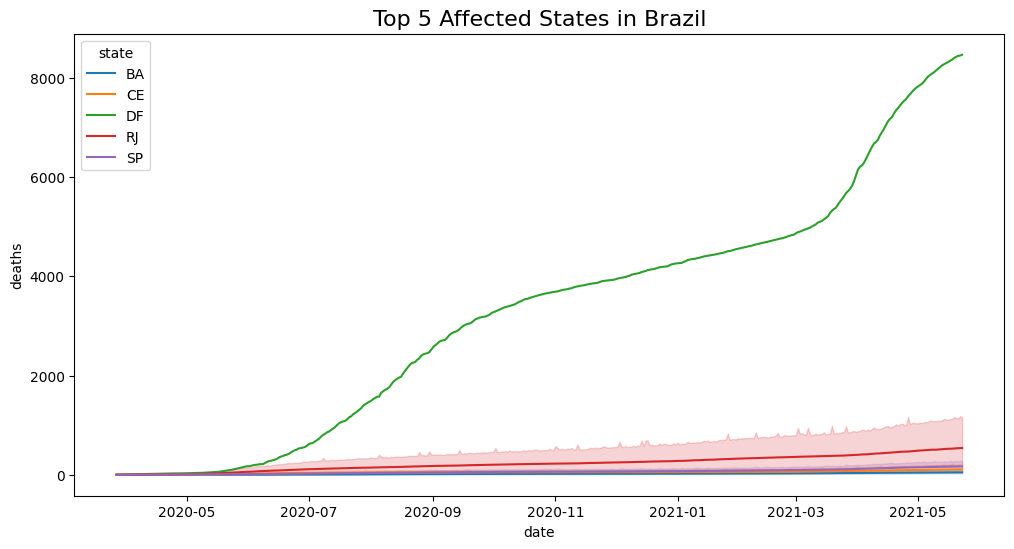

In [30]:
# Growth Trend

fig = plt.figure(figsize=(12, 6))

ax = sns.lineplot(data= covid_df[covid_df['state'].isin(['SP', 'DF', 'RJ', 'CE', 'BA'])],
                  x = 'date',
                  y = 'deaths',
                  hue = 'state')

ax.set_title('Top 5 Affected States in Brazil', size = 16)

#Meia e Completa vacinação#

In [31]:
vaccine_df.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Brazil,2021-01-17,Sinovac,https://coronavirusbra1.github.io,112.0,112.0,0.0,0.0
1,Brazil,2021-01-18,Sinovac,https://coronavirusbra1.github.io,1109.0,1109.0,0.0,0.0
2,Brazil,2021-01-19,Sinovac,https://coronavirusbra1.github.io,13527.0,13527.0,0.0,0.0
3,Brazil,2021-01-20,Sinovac,https://coronavirusbra1.github.io,105824.0,105824.0,0.0,0.0
4,Brazil,2021-01-21,Sinovac,https://coronavirusbra1.github.io,193699.0,193699.0,0.0,0.0


In [32]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 700 non-null    object 
 1   date                     700 non-null    object 
 2   vaccine                  700 non-null    object 
 3   source_url               700 non-null    object 
 4   total_vaccinations       695 non-null    float64
 5   people_vaccinated        691 non-null    float64
 6   people_fully_vaccinated  694 non-null    float64
 7   total_boosters           683 non-null    float64
dtypes: float64(4), object(4)
memory usage: 43.9+ KB


In [33]:
people_vaccinated = vaccine_df['people_vaccinated'].sum()
people_fully_vaccinated = vaccine_df['people_fully_vaccinated'].sum()

px.pie(names=['vaccinated', 'fully_vaccinated'], values=[people_vaccinated, people_fully_vaccinated], title = 'Vaccinated and Fully Vaccinated')

#Daily Trend Analysis#

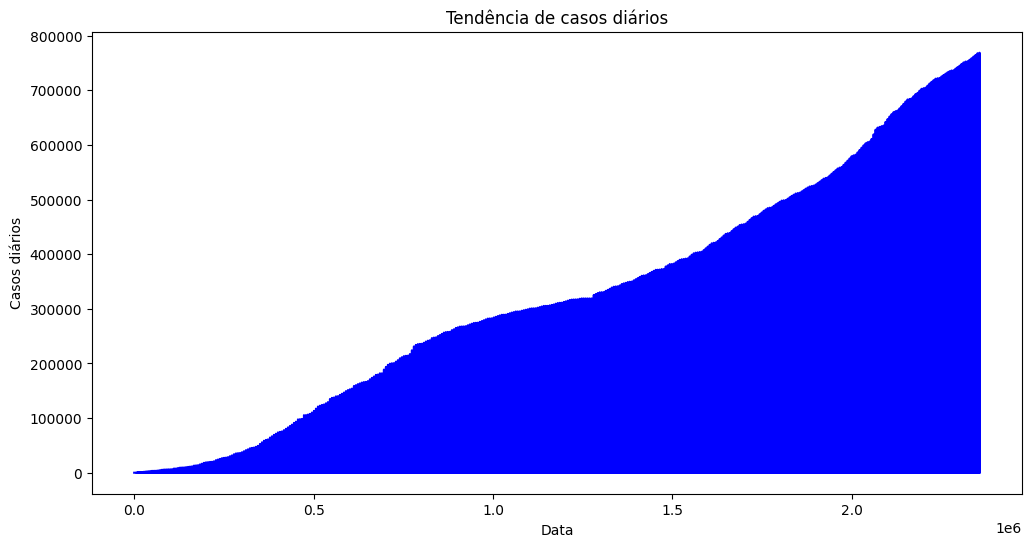

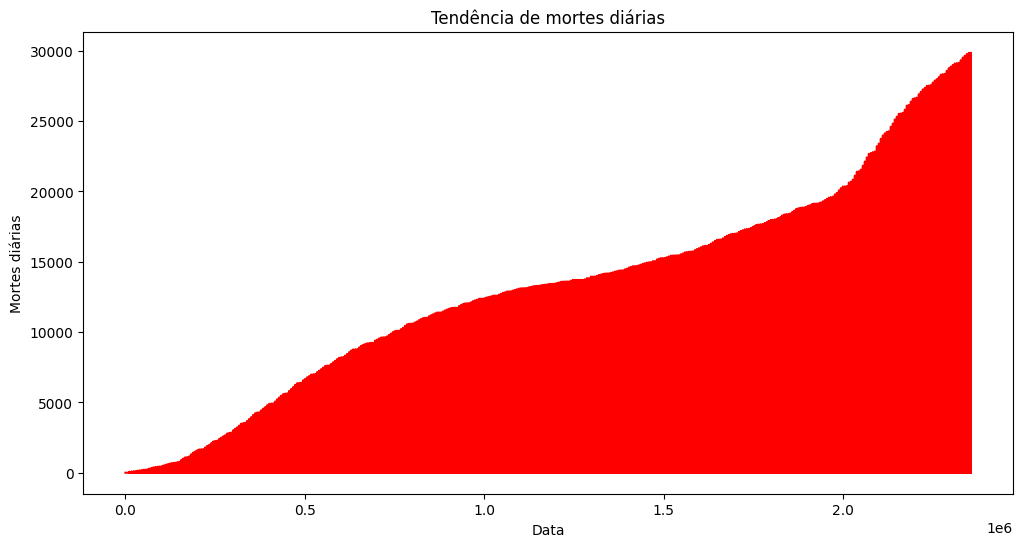

In [34]:
# Criar um gráfico dos casos diários
plt.figure(figsize=(12, 6))
plt.plot(covid_df.index, covid_df['cases'], color='blue')
plt.title('Tendência de casos diários')
plt.xlabel('Data')
plt.ylabel('Casos diários')
plt.show()

# Criar um gráfico das mortes diárias
plt.figure(figsize=(12, 6))
plt.plot(covid_df.index, covid_df['deaths'], color='red')
plt.title('Tendência de mortes diárias')
plt.xlabel('Data')
plt.ylabel('Mortes diárias')
plt.show()

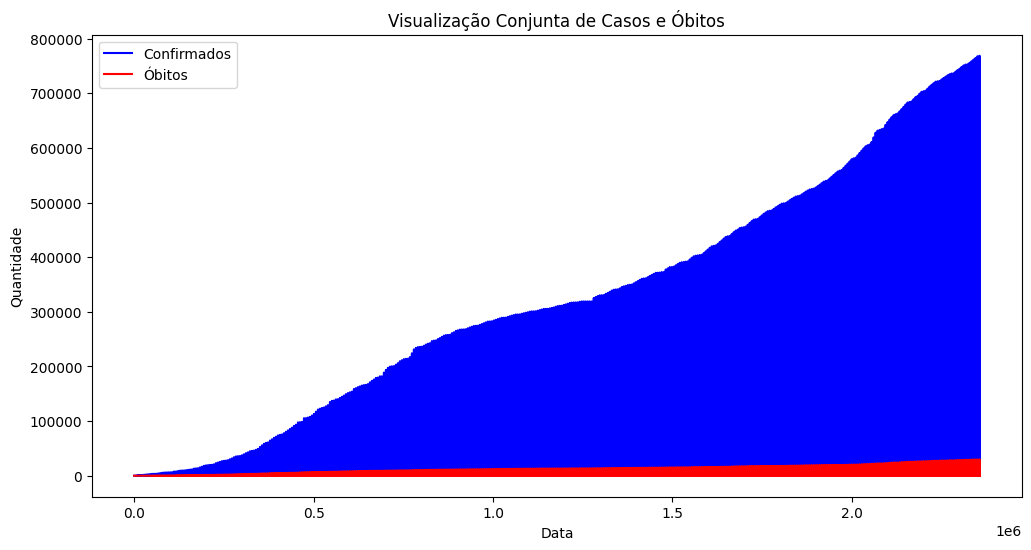

In [35]:
# Definir o tamanho da figura
plt.figure(figsize=(12, 6))

# Definir o título do gráfico
plt.title("Visualização Conjunta de Casos e Óbitos")

# Plotar as barras de casos e óbitos
plt.plot(covid_df.index, covid_df['cases'], label='Confirmados', color='blue')
plt.plot(covid_df.index, covid_df['deaths'], label='Óbitos', color='red')

# Definir os rótulos dos eixos x e y
plt.xlabel('Data')
plt.ylabel('Quantidade')

# Exibir a legenda
plt.legend()

# Exibir o gráfico
plt.show()

#Analise Comparativa

In [36]:
# Carregar os dados de casos de COVID-19 e população
covid_df = pd.read_csv('brazil_covid19_cities.csv')
population_df = pd.read_csv('brazil_population_2019.csv', sep=',', encoding='utf-8', error_bad_lines=False)


<ipython-input-36-d38eb2730796>:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



Skipping line 1282: expected 8 fields, saw 9
Skipping line 1283: expected 8 fields, saw 9
Skipping line 1293: expected 8 fields, saw 9
Skipping line 1294: expected 8 fields, saw 9
Skipping line 1300: expected 8 fields, saw 9
Skipping line 1308: expected 8 fields, saw 9
Skipping line 1309: expected 8 fields, saw 9
Skipping line 1314: expected 8 fields, saw 9
Skipping line 1319: expected 8 fields, saw 9
Skipping line 1320: expected 8 fields, saw 9
Skipping line 1321: expected 8 fields, saw 9
Skipping line 1323: expected 8 fields, saw 9



In [37]:
def converter_estados(val):
    val = val.upper()
    data = None
    
    ufs = {
        "AC": "Acre",
        "AL": "Alagoas",
        "AM": "Amazonas",
        "AP": "Amapá",
        "BA": "Bahia",
        "CE": "Ceará",
        "DF": "Distrito Federal",
        "ES": "Espírito Santo",
        "GO": "Goiás",
        "MA": "Maranhão",
        "MG": "Minas Gerais",
        "MS": "Mato Grosso do Sul",
        "MT": "Mato Grosso",
        "PA": "Pará",
        "PB": "Paraíba",
        "PE": "Pernambuco",
        "PI": "Piauí",
        "PR": "Paraná",
        "RJ": "Rio de Janeiro",
        "RN": "Rio Grande do Norte",
        "RO": "Rondônia",
        "RR": "Roraima",
        "RS": "Rio Grande do Sul",
        "SC": "Santa Catarina",
        "SE": "Sergipe",
        "SP": "São Paulo",
        "TO": "Tocantíns"
    }
    
    estados = {
        "ACRE": "AC",
        "ALAGOAS": "AL",
        "AMAZONAS": "AM",
        "AMAPÁ": "AP",
        "BAHIA": "BA",
        "CEARÁ": "CE",
        "DISTRITO FEDERAL": "DF",
        "ESPÍRITO SANTO": "ES",
        "GOIÁS": "GO",
        "MARANHÃO": "MA",
        "MINAS GERAIS": "MG",
        "MATO GROSSO DO SUL": "MS",
        "MATO GROSSO": "MT",
        "PARÁ": "PA",
        "PARAÍBA": "PB",
        "PERNAMBUCO": "PE",
        "PIAUÍ": "PI",
        "PARANÁ": "PR",
        "RIO DE JANEIRO": "RJ",
        "RIO GRANDE DO NORTE": "RN",
        "RONDÔNIA": "RO",
        "RORAIMA": "RR",
        "RIO GRANDE DO SUL": "RS",
        "SANTA CATARINA": "SC",
        "SERGIPE": "SE",
        "SÃO PAULO": "SP",
        "TOCANTÍNS": "TO"
    }
        
    if val.upper() in ufs:
        data = ufs[val]
    elif val.upper() in estados:
        data = estados[val]
    
    return data

In [38]:
population_df['state'].astype(str)
population_df['state'] = population_df['state'].apply(converter_estados)

In [39]:
population_df.head()

,region,state,city,state_code,city_code,health_region_code,health_region,population
0,Centro-Oeste,MS,Alcinópolis,50,500025,50001,Campo Grande,5343
1,Centro-Oeste,MS,Amambai,50,500060,50003,Dourados,39396
2,Centro-Oeste,MS,Bataguassu,50,500190,50004,Três Lagoas,23024
3,Centro-Oeste,MS,Batayporã,50,500200,50003,Dourados,11329
4,Centro-Oeste,MS,Bela Vista,50,500210,50001,Campo Grande,24629


In [40]:
covid_df.head()

,date,state,name,code,cases,deaths
0,2020-03-27,AC,Acrelândia,120001.0,0.0,0
1,2020-03-27,AC,Assis Brasil,120005.0,0.0,0
2,2020-03-27,AC,Brasiléia,120010.0,0.0,0
3,2020-03-27,AC,Bujari,120013.0,0.0,0
4,2020-03-27,AC,Capixaba,120017.0,0.0,0


In [41]:
population_df.rename(columns={'city': 'name'}, inplace=True)
population_df.head()

,region,state,name,state_code,city_code,health_region_code,health_region,population
0,Centro-Oeste,MS,Alcinópolis,50,500025,50001,Campo Grande,5343
1,Centro-Oeste,MS,Amambai,50,500060,50003,Dourados,39396
2,Centro-Oeste,MS,Bataguassu,50,500190,50004,Três Lagoas,23024
3,Centro-Oeste,MS,Batayporã,50,500200,50003,Dourados,11329
4,Centro-Oeste,MS,Bela Vista,50,500210,50001,Campo Grande,24629


In [42]:
# Agrupar os dados por estado e calcular o total de casos
total_cases_by_state = covid_df.groupby('state')['cases'].sum()

In [43]:
# Calcular a população total por estado
total_population_by_state = population_df.groupby('state')['population'].sum()


In [44]:
# Criar um novo dataframe com as informações de casos e população por estado
comparison_df = pd.DataFrame({'Total Cases': total_cases_by_state, 'Total Population': total_population_by_state})

In [45]:
# Ordenar os estados de acordo com o número de casos
comparison_df = comparison_df.sort_values(by='Total Cases', ascending=False)

In [46]:
# Calcular a taxa de casos por 100.000 habitantes
comparison_df['Cases per 100K'] = (comparison_df['Total Cases'] / comparison_df['Total Population']) * 100000

<Figure size 1200x600 with 0 Axes>

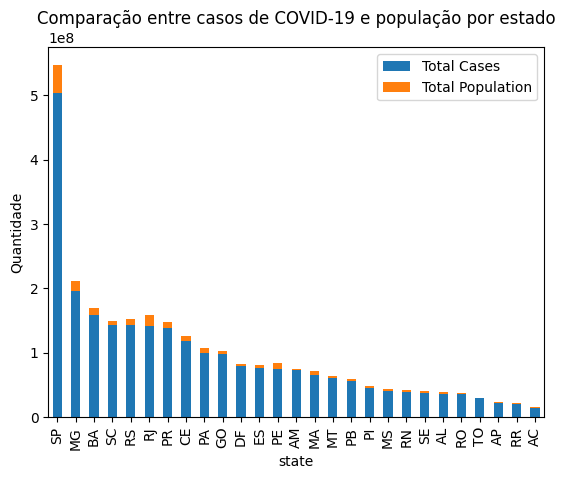

In [47]:
# Plotar o gráfico de comparação
plt.figure(figsize=(12, 6))
comparison_df[['Total Cases', 'Total Population']].plot(kind='bar', stacked=True)
plt.ylabel('Quantidade')
plt.title('Comparação entre casos de COVID-19 e população por estado')
plt.show()

#Modelatem de séries temporais

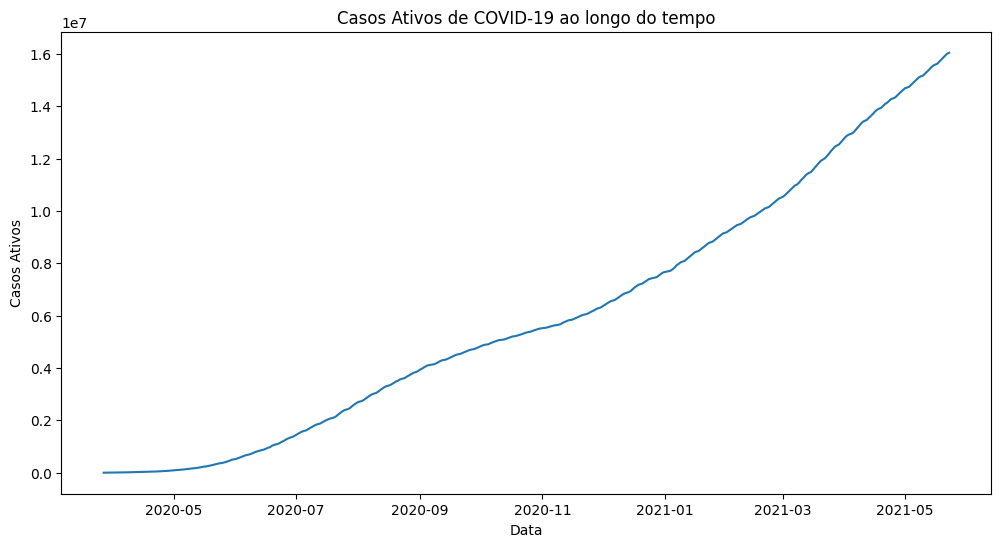

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



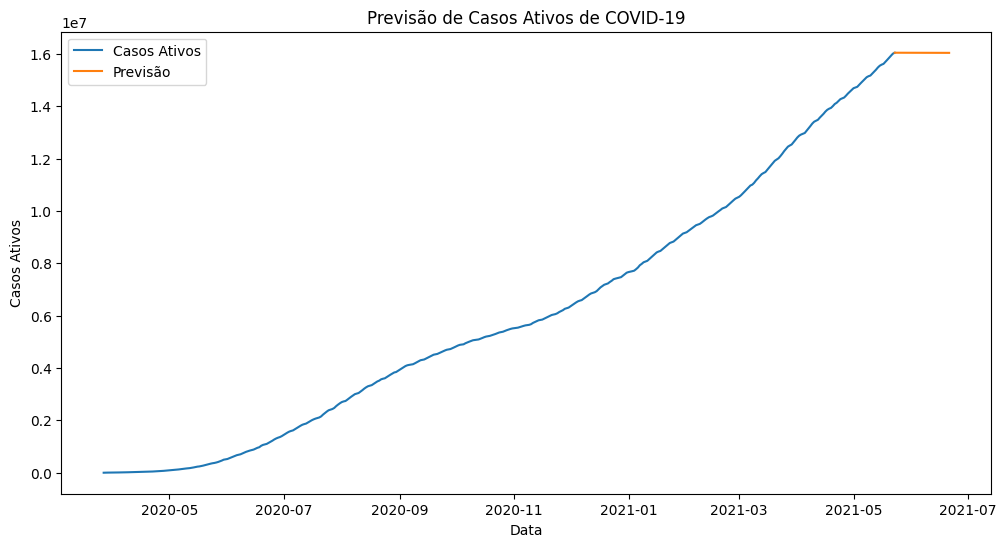

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Carregar os dados de casos ativos de COVID-19
covid_df = pd.read_csv('brazil_covid19_cities.csv')

# Agrupar os dados por data e calcular o total de casos ativos
cases_by_date = covid_df.groupby('date')['cases'].sum()

# Converter a coluna de data para o tipo datetime
cases_by_date.index = pd.to_datetime(cases_by_date.index)

# Plotar o gráfico da série temporal
plt.figure(figsize=(12, 6))
plt.plot(cases_by_date)
plt.xlabel('Data')
plt.ylabel('Casos Ativos')
plt.title('Casos Ativos de COVID-19 ao longo do tempo')
plt.show()

# Ajustar o modelo ARIMA
model = ARIMA(cases_by_date, order=(1, 0, 0))
model_fit = model.fit()

# Realizar previsões futuras
future_dates = pd.date_range(start=cases_by_date.index[-1], periods=30, freq='D')
forecast = model_fit.predict(start=len(cases_by_date), end=len(cases_by_date)+29)

# Plotar as previsões futuras
plt.figure(figsize=(12, 6))
plt.plot(cases_by_date, label='Casos Ativos')
plt.plot(future_dates, forecast, label='Previsão')
plt.xlabel('Data')
plt.ylabel('Casos Ativos')
plt.title('Previsão de Casos Ativos de COVID-19')
plt.legend()
plt.show()


#Análise de Correlação

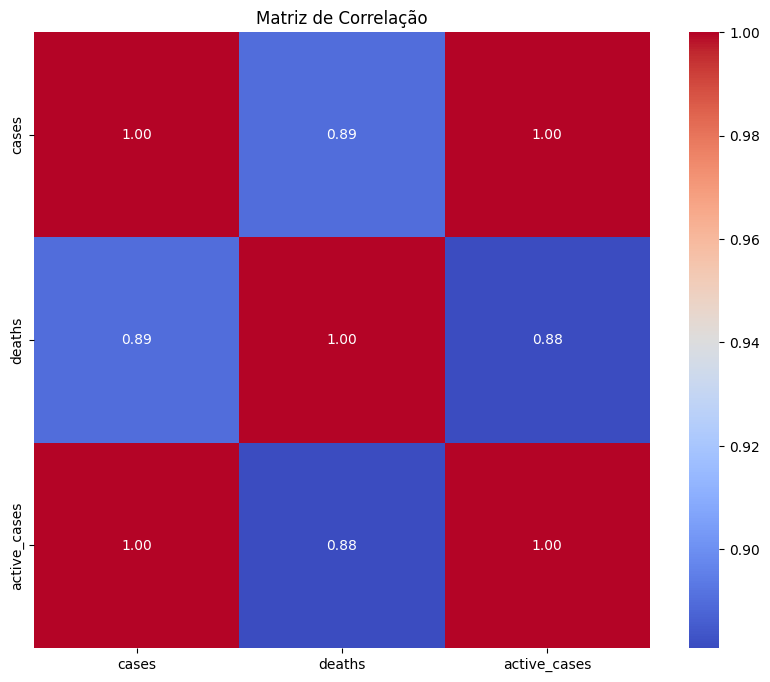

In [49]:
# Carregar o dataframe covid_df
covid_df = pd.read_csv('brazil_covid19_cities.csv')
covid_df['active_cases'] = covid_df['cases'] - covid_df['deaths']

# Selecionar as colunas relevantes para a análise de correlação
selected_columns = ['cases', 'deaths', 'active_cases']

# Criar um novo dataframe contendo apenas as colunas selecionadas
correlation_df = covid_df[selected_columns]

# Calcular a matriz de correlação
correlation_matrix = correlation_df.corr()

# Plotar a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlação')
plt.show()
